In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

predDf = pd.read_csv('./blast_aligned_pred.csv')
rmsdDf = pd.read_csv('./blast_aligned_rmsds.csv')

predDict = {}
rmsdDict = {}
y_test = []
y_score = []
for i, row in rmsdDf.iterrows():
    rmsdDict[row['blast']] = float(row['rmsd'])

for i, row in predDf.iterrows():
    pid = row['name']
    if pid not in rmsdDict or rmsdDict[pid]>4.0:
        continue
    predDict[pid] = float(row['pred'])
    y_score.append(float(row['pred']))
    if rmsdDict[pid] < 2.0:
        y_test.append(1)
    else:
        y_test.append(0)


In [2]:
y_score

[1.7638418512433418e-06,
 0.5,
 0.5,
 3.8968854185195134e-12,
 1.9676525072136156e-16,
 1.030986550176749e-05,
 0.9999998807907104,
 1.0703796737843163e-09,
 1.516206225460337e-06,
 2.8275679142097943e-05,
 1.4552555285263225e-06,
 0.0006407861365005,
 0.0002236401342088,
 9.35156913328683e-06,
 4.616344199265265e-13,
 0.5,
 7.817803347944668e-16,
 0.0001456167374271,
 0.5,
 7.16302821501813e-08,
 0.5,
 0.0620897896587848,
 0.5,
 3.1398169336891112e-16,
 0.5,
 2.2444006653188353e-09,
 0.0002243181661469,
 0.0031485673971474,
 0.5430524349212646,
 0.5,
 0.0003116745501756,
 0.5,
 0.5,
 6.768759996944596e-10,
 1.5739163885229463e-16,
 4.105971562751165e-09,
 0.1106460019946098,
 8.041474708342378e-10,
 3.3042974823330185e-13,
 0.5,
 0.5,
 2.517637087915141e-15,
 6.26487590693614e-08,
 4.154733233008301e-06,
 1.585298923147268e-16,
 4.805453386325098e-07,
 0.5,
 0.0046076993457973,
 6.40824004971563e-10,
 0.5,
 2.8908641973302007e-12,
 5.934231808168988e-07,
 2.235935535615961e-17,
 9.266

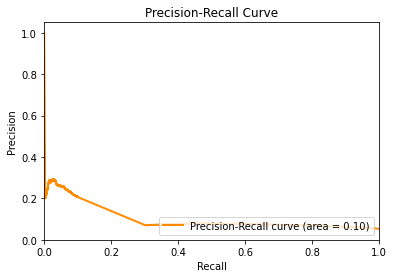

In [12]:
# Compute ROC curve and ROC area for each class
precision, recall, _ = roc_curve(y_test, y_score, pos_label=1)
pr_auc = auc(recall, precision)
#print(fpr, tpr)

plt.figure()
lw = 2
plt.plot(
    recall,
    precision,
    color="darkorange",
    lw=lw,
    label="Precision-Recall curve (area = %0.2f)" % pr_auc,
)
#plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("TPR")
plt.ylabel("")
plt.title("Precision-Recall Curve")
plt.legend(loc="lower right")
plt.savefig('./prCurve1.png', dpi=400)

In [8]:
plt.savefig('./prCurve.png', dpi=400)

<Figure size 432x288 with 0 Axes>